## SVD PTT: wav file alignment

In [1]:
import os
import torch, torchvision
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from pystoi import stoi

In [2]:
# %matplotlib notebook
# %matplotlib inline

#### Machine paths

In [4]:
# path = "/home/david/sigMF_ML/RF_SVD/clean_speech/IQ_files/dmr_aligned/dmr_1024_aligned_20210519/" # ace
path_save = "/home/david/sigMF_ML/RF_SVD/clean_speech/IQ_files/uv5r_aligned/ptt_aligned_20210519/stoi_save/" # ace
print(path_save)

/home/david/sigMF_ML/RF_SVD/clean_speech/IQ_files/uv5r_aligned/ptt_aligned_20210519/stoi_save/


#### reading sigmf meta data and encoder function

In [15]:
# def calculate_sdr(source_signal, estimated_signal, offset=None, scale_invariant=True):
#     # For regular SDR, set “scale_invariant” to False, for SISDR, set it to True.
#     s = source_signal
#     y = estimated_signal
#     # add a batch axis if non-existant
#     if len(s.shape) != 2:
#         s = s.unsqueeze(0)
#         y = y.unsqueeze(0)
#     # truncate all signals in the batch to match the minimum-length
#     min_length = min(s.shape[-1], y.shape[-1])
#     s = s[..., :min_length]
#     y = y[..., :min_length]
#     if scale_invariant:
#         alpha = s.mm(y.T).diag()
#         alpha /= ((s ** 2).sum(dim=1) + eps)
#         alpha = alpha.unsqueeze(1)  # to allow broadcasting
#     else:
#         alpha = 1
#     e_target = s * alpha
#     e_res = e_target - y
#     numerator = (e_target ** 2).sum(dim=1)
#     denominator = (e_res ** 2).sum(dim=1) + eps
#     sdr = 10 * torch.log10((numerator / denominator) + eps)
#     # if `offset` is non-zero, this function returns the relative SDR
#     # improvement for each signal in the batch
#     if offset is not None:
#         sdr -= offset
#     return sdr

In [16]:
# print(path)
# os.chdir(path)

/home/david/sigMF_ML/RF_SVD/clean_speech/IQ_files/dmr_aligned/dmr_1024_aligned_20210519/


In [17]:
# eps = np.finfo(np.float32).eps

In [29]:
# # clean, fs = sf.read(path+'original_clean_aligned.wav')
# # clean, fs = sf.read(path+'1914-133440-0016.flac')
# clean, fs = sf.read(path+'dmr_clean_speech_aligned.wav')
# c = len(clean)
# original_clean = clean
# original_c = c
# # print('clean length = ', c)
# # print('fs original = ', fs)
# rank_list = [5,6,7,8,9,10,1000]
# d1 = np.zeros(len(rank_list), dtype = float)
# SNR_calc = np.zeros(len(rank_list), dtype = float)
# m = 0
# # print('d1 = ', d1)
# for i in rank_list:
# #     print('rank =', i)
#     if (i != 1000):
#         fullpath =path+'dmr_svd'+'{0:02d}'.format(i)+'_aligned.wav'
#         denoised, fs = sf.read(fullpath)
#         de = len(denoised)
# #         print('de length = ', de)
#         if c > de:
#             clean = clean[0:de]
# #             print('clean new length = ', len(clean))
#         else:
#             denoised = denoised[0:c]
# #             print('denoised new length = ', len(denoised))
#         # Clean and den should have the same length, and be 1D
#         d1[m] = stoi(clean, denoised, fs, extended=False)
#         SNR_calc[m] = calculate_sdr(torch.Tensor(clean), torch.Tensor(denoised))
#     elif (i == 1000): # This is the full vector - NO SVD
#         denoised, fs = sf.read(path+'dmr_clean_speech_aligned.wav')
#         de = len(denoised)
#         if c > de:
#             clean = clean[0:de]
#         else:
#             denoised = denoised[0:c]
#     d1[m] = stoi(clean, denoised, fs, extended=False)
#     SNR_calc[m] = calculate_sdr(torch.Tensor(clean), torch.Tensor(denoised))
#     m=m+1
#     clean = original_clean
#     c = original_c

### Using Minje's matlab stoi code

In [5]:
rank_list = [2,3,4,5,6,7,8,9,10]
# num = 6
# np.asarray(rank_list[:num])

In [12]:
d2 = [0.0822, 0.1008, 0.7364, 0.7643, 0.7614, 0.7968, 0.7762, 0.7919, 0.7805] # stoi results from Minje's matlab code
d2 = np.asarray(d2)

In [13]:
d2

array([0.0822, 0.1008, 0.7364, 0.7643, 0.7614, 0.7968, 0.7762, 0.7919,
       0.7805])

In [14]:
# num = 6
# os.chdir(path_save)
# np.save('rank_list_dmr', np.asarray(rank_list[:num]))
# np.save('dmr', d1[:num])   

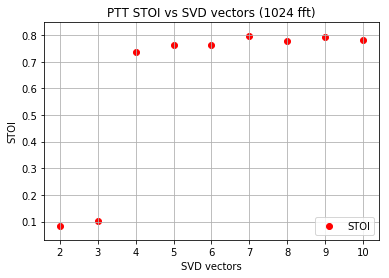

In [15]:
plt.figure(figsize=(9, 6))
fig = plt.figure()
plt.scatter(rank_list,d2,c='r', label='STOI')
plt.legend(loc='lower right')
plt.title('PTT STOI vs SVD vectors (1024 fft)')
plt.xlabel('SVD vectors')
plt.ylabel('STOI')
# plt.ylim(.85, .93)
# plt.xlim(4.9, 10.1)
plt.grid()
fig.savefig('ptt_stoi.pdf', format="pdf")
plt.show()

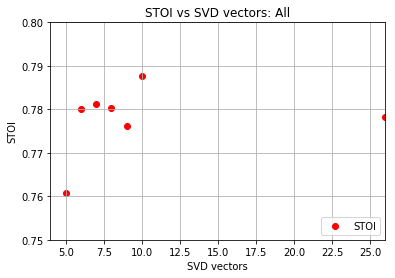

In [26]:
plt.figure(figsize=(9, 6))
fig2 = plt.figure()
plt.scatter(rank_list,d1,c='r', label='STOI')
plt.legend(loc='lower right')
plt.title('STOI vs SVD vectors: All')
plt.xlabel('SVD vectors')
plt.ylabel('STOI')
plt.ylim(.75, .8)
plt.xlim(4, 26)
plt.grid()
fig2.savefig('dmr_stoi_all.png', format="png")
plt.show()